In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re 
from nltk.corpus import stopwords
import string

data = pd.read_csv('filename.csv')
print(data.head())

                    id      conversation_id               created_at  \
0  1589790221746712576  1589760170938470400  2022-11-08 01:21:40 UTC   
1  1589790216277356544  1589790216277356544  2022-11-08 01:21:39 UTC   
2  1589790214956122112  1589701298760298497  2022-11-08 01:21:38 UTC   
3  1589790204491337728  1589790204491337728  2022-11-08 01:21:36 UTC   
4  1589790202352238593  1589790202352238593  2022-11-08 01:21:35 UTC   

         date      time  timezone              user_id        username  \
0  2022-11-08  01:21:40         0  1493971842104803330      twitelitav   
1  2022-11-08  01:21:39         0            170517181  canadiankitty1   
2  2022-11-08  01:21:38         0  1431319580220215304    qwertydude14   
3  2022-11-08  01:21:36         0  1579720363318988800  the_vtolhussar   
4  2022-11-08  01:21:35         0  1314241954058833926     mrkovalenko   

               name place  ... geo source user_rt_id user_rt retweet_id  \
0          Eli 🌻🇪🇺🌻   NaN  ... NaN    NaN      

In [9]:
#Let’s have a quick look at all the column names of the dataset:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [10]:
#We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward:
data = data[['username', 'tweet', 'language']]


In [11]:
#Let’s have a look at whether any of these columns contains any null values or not:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [12]:
#So none of the columns has null values, let’s have a quick look at how many tweets are posted in which language:
data['language'].value_counts()

en     8784
pt      424
it      191
qme     146
ca       77
in       74
und      42
es       42
ru       30
ja       23
fi       22
uk       19
fr       18
qht      18
th       12
bn        9
hi        9
tl        8
ro        8
vi        8
de        7
nl        7
zh        6
et        4
ar        4
qam       3
ht        1
tr        1
da        1
no        1
zxx       1
pl        1
bg        1
Name: language, dtype: int64

In [13]:
#So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


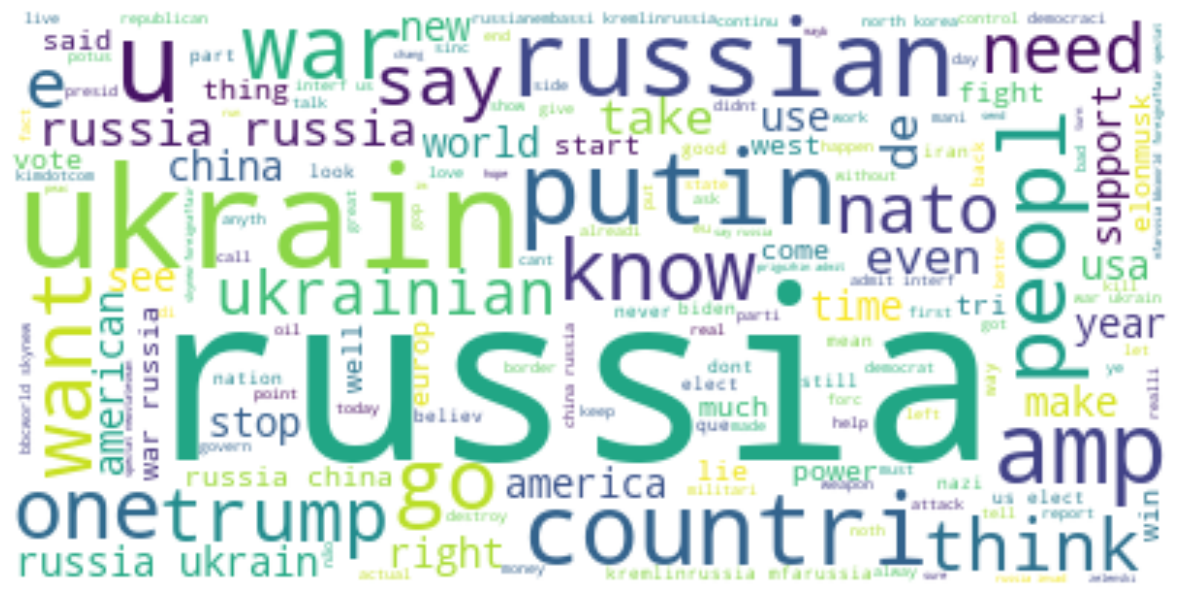

In [14]:
#Now let’s have a look at the wordcloud of the tweets, which will show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fatih\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  ludzbunjenog hbkishpaugh kimdotcom russia lost...     0.081     0.236   
1  🇷🇺‼️with volga sea cluster vladimir putin repl...     0.000     0.000   
2  luiszambranopow alfreddezaya soviet dream beco...     0.229     0.293   
3  rapper seek polit asylum russia — rt game amp ...     0.000     0.000   
4  today  year sinc communism revolut russia vict...     0.084     0.545   

   Neutral  
0    0.683  
1    1.000  
2    0.478  
3    1.000  
4    0.370  


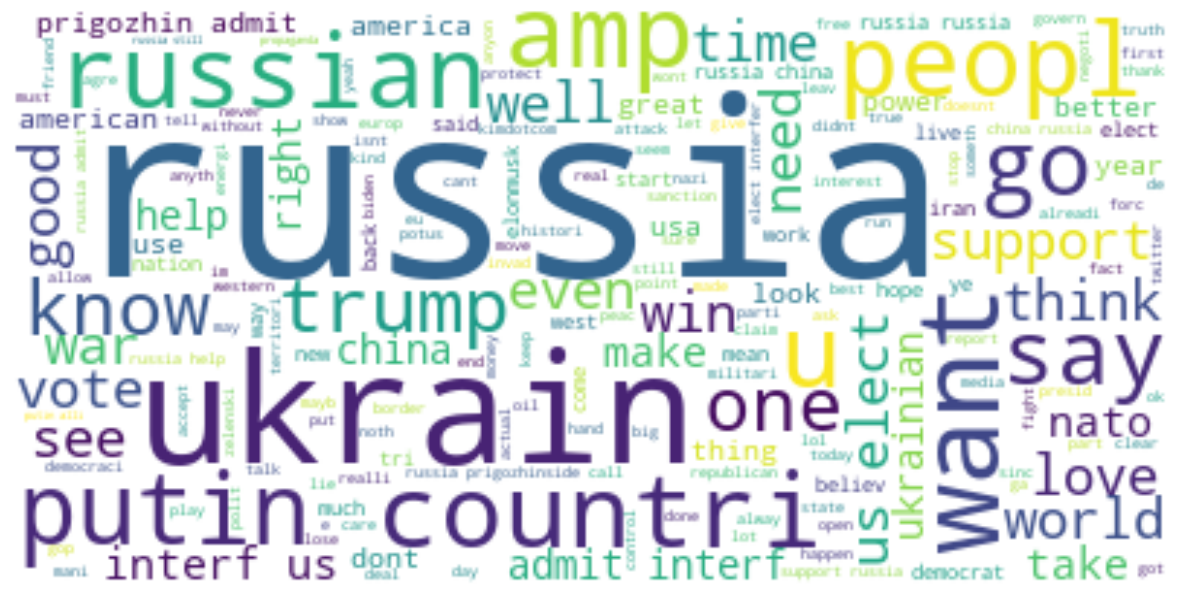

In [16]:
#Now let’s have a look at the most frequent words used by people with positive sentiments:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

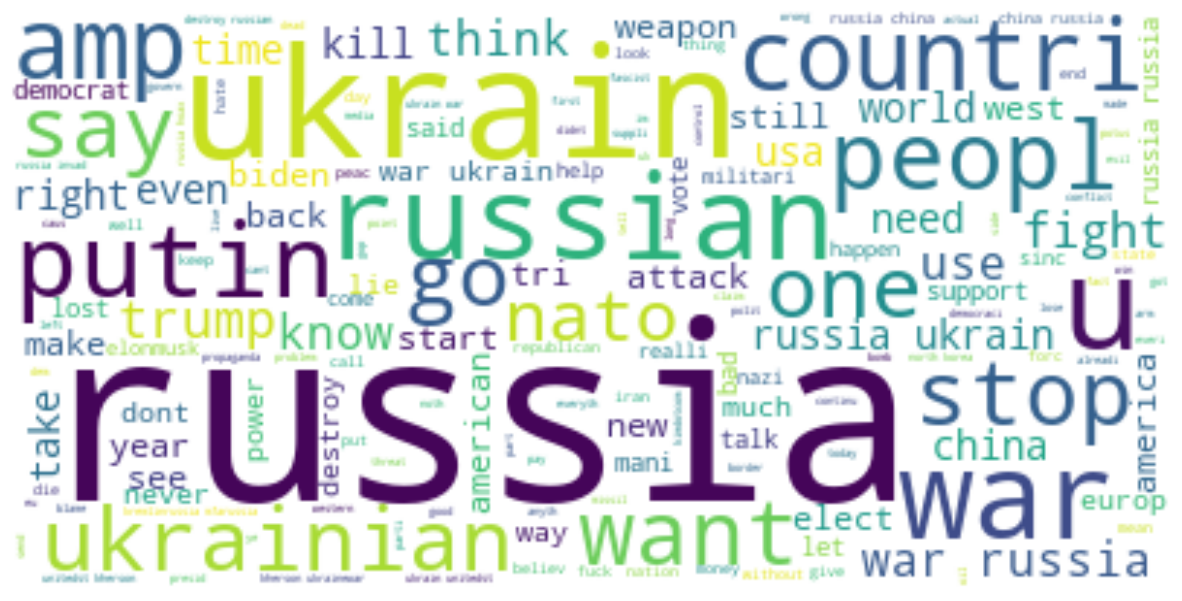

In [17]:
#Now let’s have a look at the most frequent words used by people with negative sentiments:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()